In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris=pd.read_csv("C:/Users/mchil/Downloads/Python batch/Python Pred Modeling All notebooks + Datasets/Python Datasets/Classification Datasets/IRIS.csv")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris.duplicated().sum()
iris.drop_duplicates(inplace=True)

In [5]:
iris.shape

(149, 5)

### Problem Statement
* Target:- Species (to predict species based on characteristics)
* Predictors :- Sepal.width,petal.width,sepal.length,petal.width

### Analysing Distribution of Target Variable

<AxesSubplot:xlabel='Species'>

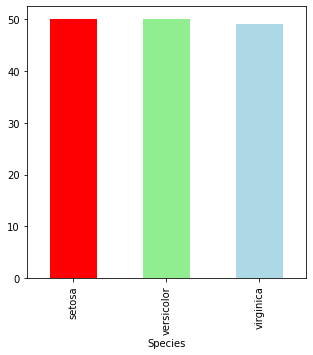

In [6]:
iris.groupby('Species').size().plot(kind='bar',figsize=(5,5),color=['red','lightgreen','lightblue'])

### Basic Data Exploration
* Info()
* Describe()
* nunique()


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  149 non-null    float64
 1   Sepal.Width   149 non-null    float64
 2   Petal.Length  149 non-null    float64
 3   Petal.Width   149 non-null    float64
 4   Species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.nunique()

Sepal.Length    35
Sepal.Width     23
Petal.Length    43
Petal.Width     22
Species          3
dtype: int64

#### Data Exploration result
* Target :- Species
* Continuous Variables:- Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
* Categorical variables:- 

### Univariate Analysis
* Continuous Variables

In [10]:
predictors=['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']
Target='Species'

array([[<AxesSubplot:title={'center':'Sepal.Length'}>,
        <AxesSubplot:title={'center':'Sepal.Width'}>],
       [<AxesSubplot:title={'center':'Petal.Length'}>,
        <AxesSubplot:title={'center':'Petal.Width'}>]], dtype=object)

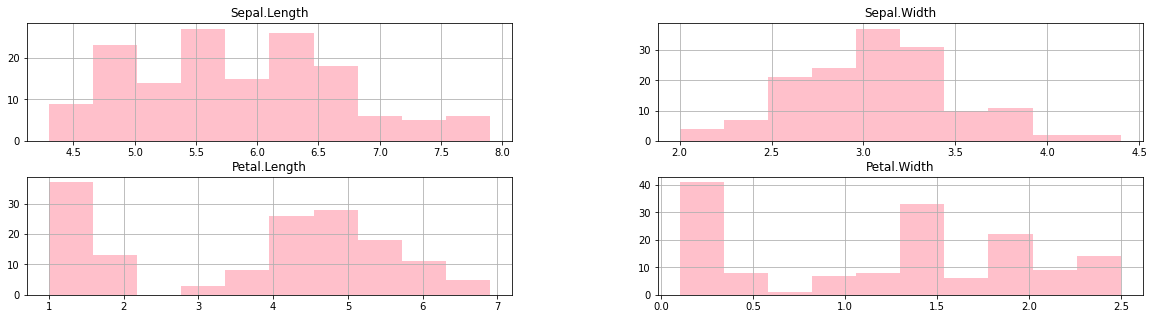

In [11]:
iris[predictors].hist(figsize=(20,5),color='pink')

* Destribution are good and all are selected no need of Any Treatment
* Selected predictors:- All

### Bivariate Analysis
* Continuous vs Categorical

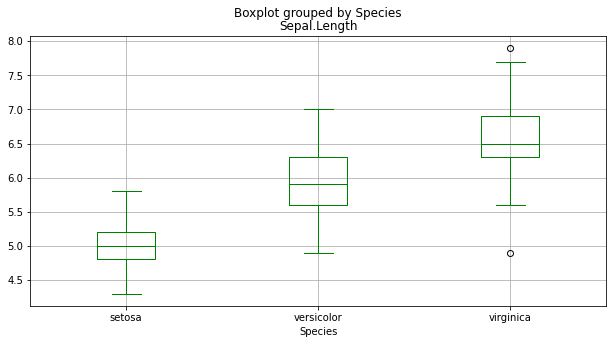

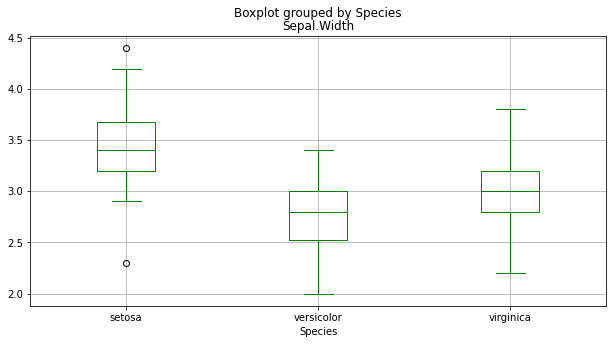

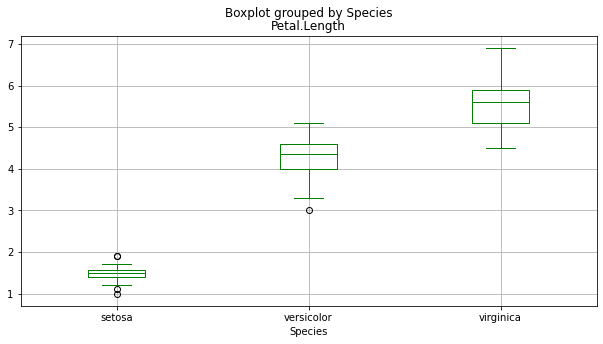

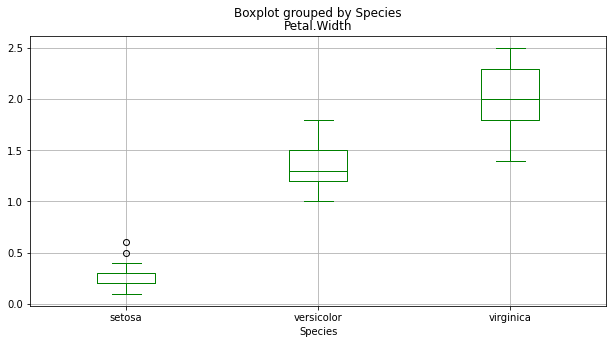

In [12]:
for i in predictors:
    iris.boxplot(column=i,by=Target,figsize=(10,5),vert=True,color='green')

In [13]:
# import seaborn as sns
# sns.violinplot(x=Target,y=predictors[0],data=irisML)

### Anova Test (Statistical analysis for Categorical vs Continuous)

In [14]:
def fun_anova(df,predictors,target):
    from scipy.stats import f_oneway
    selected=[]
    for i in predictors:
        input_val=df.groupby(target)[i].apply(list)
        
        anova=f_oneway(*input_val)
        
        if (anova[1]<0.05):
            print("Column {} is correlated with Target | P-value : {}".format(i,anova[1]))
            selected.append(i)
        
        else :
            print("Column {} is Not correlated with Target | P-value : {}".format(i,anova[1]))
        
    return selected

fun_anova(iris,predictors,Target)


Column Sepal.Length is correlated with Target | P-value : 8.178903452683672e-32
Column Sepal.Width is correlated with Target | P-value : 5.813443567711162e-17
Column Petal.Length is correlated with Target | P-value : 8.956422528233572e-91
Column Petal.Width is correlated with Target | P-value : 1.9591764589161544e-84


['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

* Selected Predictors:- All
* Target :- Species

### Preparing Data For ML
* Converting Categorical Variables to Numerical

In [15]:
irisML=iris
irisML['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
irisML['Species'].replace({'setosa':0,'versicolor':1,'virginica':2},inplace=True)

In [17]:
irisML.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


* Standardization / Normalization of Data

In [18]:
X=irisML[predictors]
y=irisML[Target]

In [19]:
from sklearn.preprocessing import MinMaxScaler

X=MinMaxScaler().fit_transform(X)
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

* Splitting Data Into Train And Test

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=32)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(99, 4)
(50, 4)
(99,)
(50,)


### Logistic Regression


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

F1 Score of Fitted Model is :  1
[1.         1.         1.         1.         0.93265993 1.
 0.86666667 1.         1.         1.        ]
Final Average accuracy of Model is :  0.97993265993266
Accuracy score of test is :  1.0


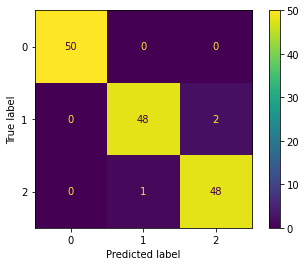

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score


LR=LogisticRegression(C=100,penalty='l2',solver='newton-cg')
LR.fit(X_train,y_train)

predLR=LR.predict(X_test)

print(classification_report(y_test,predLR))
print("F1 Score of Fitted Model is : ",round(metrics.f1_score(y_test,predLR,average='weighted')))
print(metrics.plot_confusion_matrix(LR,X,y))

cv=cross_val_score(LR,X,y,cv=10,scoring='f1_weighted')
print(cv)
print("Final Average accuracy of Model is : ",np.mean(cv))
print("Accuracy score of test is : ",metrics.accuracy_score(y_test,predLR))

### Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

F1 Score of Fitted Model is :  0.98


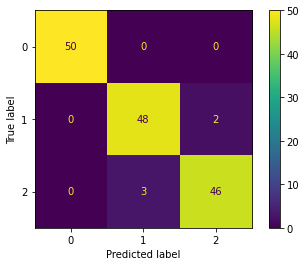

[1.         0.93265993 1.         0.93265993 0.93265993 0.93265993
 0.93265993 0.93265993 1.         1.        ]
Final Average accuracy of Model is :  0.9596
Accuracy score of test is :  0.98


<AxesSubplot:title={'center':'Feature Importances'}>

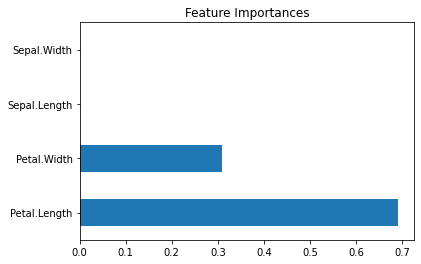

In [22]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier(max_depth=3,criterion='entropy')
DT.fit(X_train,y_train)
predDT=DT.predict(X_test)


print(classification_report(y_test,predDT))
print("F1 Score of Fitted Model is : ",round(metrics.f1_score(y_test,predDT,average='weighted'),4))
print(metrics.plot_confusion_matrix(DT,X,y))
plt.show()

cv=cross_val_score(DT,X,y,cv=10,scoring='f1_weighted')
print(cv)
print("Final Average accuracy of Model is : ",round(np.mean(cv),4))
print("Accuracy score of test is : ",metrics.accuracy_score(y_test,predDT))

Features=pd.Series(DT.feature_importances_,index=predictors)
Features.nlargest(5).plot(kind='barh',title="Feature Importances")

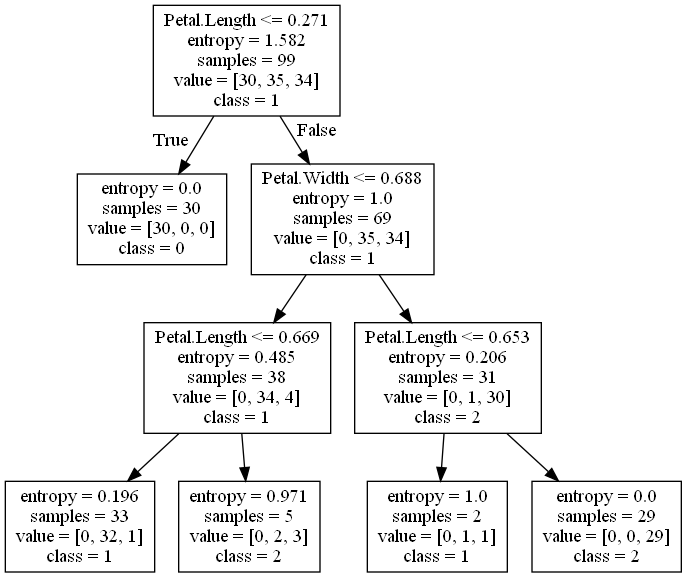

In [23]:
from IPython.display import Image
from sklearn import tree
import pydotplus

dot_tree=tree.export_graphviz(DT,out_file=None,feature_names=predictors,class_names=['0','1','2'])

tree=pydotplus.graph_from_dot_data(dot_tree)

Image(tree.create_png(),width=500,height=500)

In [24]:
from flask import request,Flask,jsonify

app=Flask(__name__)

@app.route('/home_name',methods=['Get'])

def home_name():
    try:
        Time_Spent_value = request.args.get('home_name')
        return("Hey")
    
    except Exception as e:
        return ("oops")
    
if __name__=='__main__':
    app.run(host='127.0.0.1',port=8080,threaded=True,debug=True,use_reloader=False)
    

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)


### Random Forest


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

F1 Score of Fitted Model is :  1.0


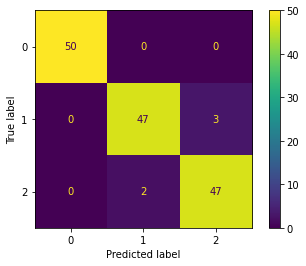

[1.         0.93265993 1.         0.93265993 0.93265993 0.93265993
 0.7979798  1.         1.         1.        ]
Final Average accuracy of Model is :  0.9529
Accuracy score of test is :  1.0


<AxesSubplot:title={'center':'Feature Importances'}>

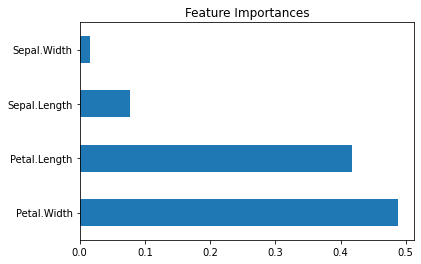

In [28]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier(n_estimators=100,max_depth=3,criterion='entropy')

RFC.fit(X_train,y_train)

predRFC=RFC.predict(X_test)

print(classification_report(y_test,predRFC))
print("F1 Score of Fitted Model is : ",round(metrics.f1_score(y_test,predRFC,average='weighted'),4))
print(metrics.plot_confusion_matrix(RFC,X,y))
plt.show()

cv=cross_val_score(RFC,X,y,cv=10,scoring='f1_weighted')
print(cv)
print("Final Average accuracy of Model is : ",round(np.mean(cv),4))
print("Accuracy score of test is : ",metrics.accuracy_score(y_test,predRFC))

Features=pd.Series(RFC.feature_importances_,index=predictors)
Features.nlargest(5).plot(kind='barh',title="Feature Importances")


### AdaBoost

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

F1 Score of Fitted Model is :  1.0


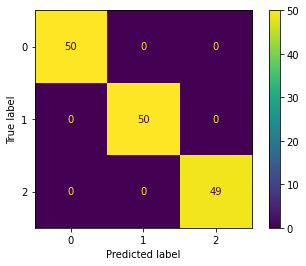

[1.         0.93265993 1.         0.93265993 0.93265993 0.93265993
 0.93265993 1.         1.         1.        ]
Final Average accuracy of Model is :  0.9663
Accuracy score of test is :  1.0


<AxesSubplot:title={'center':'Feature Importances'}>

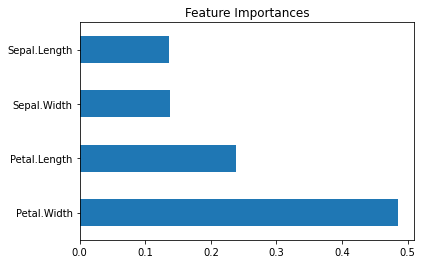

In [31]:
from sklearn.ensemble import AdaBoostClassifier

ADA=AdaBoostClassifier(base_estimator=DT,n_estimators=150,learning_rate=0.05)

ADA.fit(X_train,y_train)

predADA=ADA.predict(X_test)

print(classification_report(y_test,predADA))
print("F1 Score of Fitted Model is : ",round(metrics.f1_score(y_test,predADA,average='weighted'),4))
print(metrics.plot_confusion_matrix(ADA,X,y))
plt.show()

cv=cross_val_score(ADA,X,y,cv=10,scoring='f1_weighted')
print(cv)
print("Final Average accuracy of Model is : ",round(np.mean(cv),4))
print("Accuracy score of test is : ",metrics.accuracy_score(y_test,predADA))

Features=pd.Series(ADA.feature_importances_,index=predictors)
Features.nlargest(5).plot(kind='barh',title="Feature Importances")

### XGBoost

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

F1 Score of Fitted Model is :  1.0


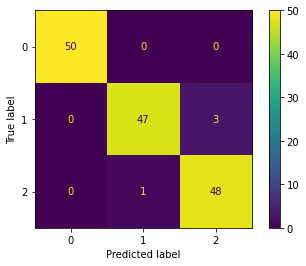

[1.         0.93265993 1.         0.93265993 0.93265993 0.93265993
 0.93265993 1.         1.         1.        ]
Final Average accuracy of Model is :  0.9663
Accuracy score of test is :  1.0


<AxesSubplot:title={'center':'Feature Importances'}>

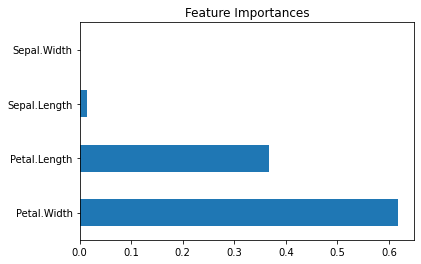

In [34]:
from xgboost import XGBClassifier

XGB=XGBClassifier(n_estimators=100,max_depth=3,objective='binary:logistic',booster='gbtree',learning_rate=0.01,eval_metric='logloss')

XGB.fit(X_train,y_train)

predXGB=XGB.predict(X_test)

print(classification_report(y_test,predXGB))
print("F1 Score of Fitted Model is : ",round(metrics.f1_score(y_test,predXGB,average='weighted'),4))
print(metrics.plot_confusion_matrix(XGB,X,y))
plt.show()

cv=cross_val_score(XGB,X,y,cv=10,scoring='f1_weighted')
print(cv)
print("Final Average accuracy of Model is : ",round(np.mean(cv),4))
print("Accuracy score of test is : ",metrics.accuracy_score(y_test,predXGB))

Features=pd.Series(XGB.feature_importances_,index=predictors)
Features.nlargest(5).plot(kind='barh',title="Feature Importances")
